In [2]:
!pip -q install SciencePlots


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [4]:
plt.style.use(['science', 'no-latex'])

In [5]:
fname = '../data/monica_weather.csv'
df = pd.read_csv(fname, sep=';')
df['de-date'] = pd.to_datetime(df['de-date'], format="%d.%m.%Y")
mask = (df['de-date']>"2011-01-01") & (df['de-date']<"2017-01-01") 
select = df.loc[mask].set_index('de-date')

In [6]:
train_id = int(len(select) * 0.7)
x = [str(select.index[0].date()), 
     str(select.index[train_id].date()), 
     str(select.index[-1].date())]

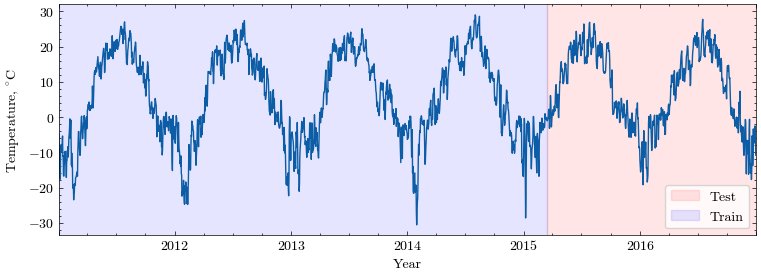

In [7]:
fig, ax1 = plt.subplots(1,1, figsize=(9,3))
select['tavg'].plot(ax=ax1, label='')
ax1.set_ylabel("Temperature, $^{\circ}$C")
ax1.set_xlabel("Year")
ax1.axvspan(x[1], 
            xmax=x[2], label='Test',
            color='red', 
            ymin=-20, 
            ymax=250,
            alpha=0.1, 
            transform=ax1.get_xaxis_transform())
ax1.axvspan(x[0], label='Train',
            xmax=x[1], 
            color='blue', 
            ymin=-20, 
            ymax=250,
            alpha=0.1,
            transform=ax1.get_xaxis_transform())

# ax2.legend()
plt.legend(frameon=True)
# plt.savefig('../plots/train_test_en.png', dpi = 300)
plt.show()

In [9]:
year = 2017
weather_files = {
                "Наблюдения": f"../monica/reanalysis_{year}.csv",
                "Среднее":f"../monica/means_{year}.csv", 
                "Prophet": f"../monica/prophet_{year}.csv",
                "Neural-prophet": f"../monica/neural_prophet_{year}.csv",
                 "SARIMAX": f"../monica/sarimax_{year}.csv"}

results_df = dict.fromkeys(list(weather_files.keys()))
results_weather = dict.fromkeys(list(weather_files.keys()))

In [10]:
for key in weather_files:
        w = pd.read_csv(weather_files[key])
        results_weather[key]=w


In [11]:
df

,de-date,tavg,tmin,tmax,wind,globrad,precip,relhumid
0,2000-01-01,-8.74,-10.44,-5.97,1.41,3.55,0.51,98.06
1,2000-01-02,-8.92,-12.29,-6.56,3.52,4.14,2.47,99.19
2,2000-01-03,-14.60,-17.18,-11.20,1.44,4.59,0.41,99.88
3,2000-01-04,-12.80,-16.44,-8.52,3.33,4.60,0.11,98.88
4,2000-01-05,-8.49,-12.60,-5.84,3.98,3.61,0.73,98.62
...,...,...,...,...,...,...,...,...
8412,2023-01-12,-12.55,-16.02,-10.24,4.75,1.08,0.34,97.00
8413,2023-01-13,-8.09,-10.93,-6.26,3.90,2.03,0.39,96.19
8414,2023-01-14,-7.15,-9.20,-4.85,3.75,1.08,0.49,96.19
8415,2023-01-15,-9.29,-11.20,-6.95,3.03,1.88,0.31,97.56


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1040 (\N{CYRILLIC CAPITAL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1053 (\N{CYRILLIC CAPITAL LETTER EN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1072 (\N{CYRILLIC SMALL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1073 (\N{CYRILLIC SMALL LETTER BE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1083 (\N{CYRILLIC SMALL LETTER EL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.

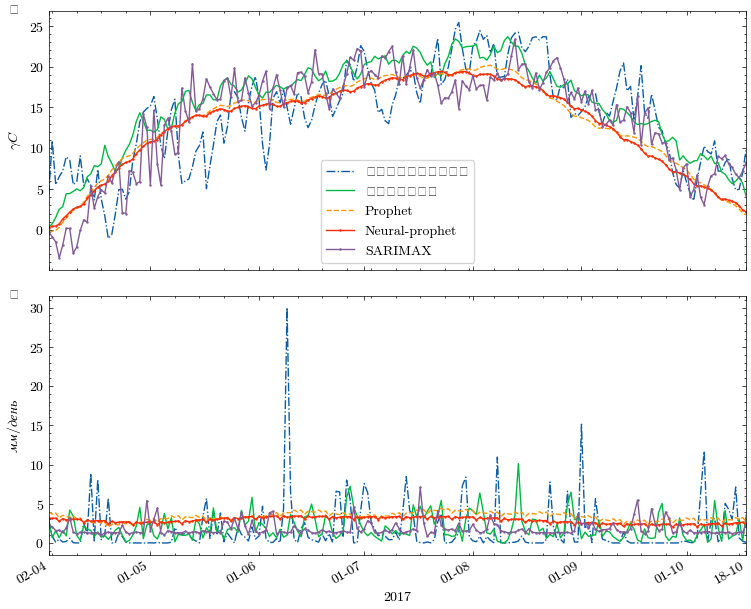

In [25]:
fname = '../monica/means_2016.csv'
mask = (df['de-date']>"2011-01-01") & (df['de-date']<"2017-01-01") 
select = df.loc[mask].set_index('de-date')


parameter = ['tavg']
styles = ['-.',  '-','--', '.-', '.-', '_']
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,8))
for i, key in enumerate(results_weather):
    df = results_weather[key]
    df['de-date'] = pd.to_datetime(df['de-date'], format="%d.%m.%Y")
    select = df.loc[(df['de-date']>'2017-04-01')&(df['de-date']<'2017-10-19')]
    select.set_index('de-date')[parameter].plot(style=styles[i], linewidth=1.0,ms=1.5, 
                                                ax=ax1, label=key)
ax1.legend(list(results_weather.keys()), frameon=True)
# ax1.grid()
ax1.set_xlabel('')
ax1.set_ylabel("$°C$")
# ax1.xaxis.set_ticklabels([])
# plt.savefig('../plots/tavg_2017.png', dpi=300)

parameter = ['precip']
styles = ['-.',  '-','--', '.-', '.-', '_']
# fig, ax1 = plt.subplots(1,1, figsize=(9,3))
for i, key in enumerate(results_weather):
    df = results_weather[key]
    df['de-date'] = pd.to_datetime(df['de-date'], format="%d.%m.%Y")
    select = df.loc[(df['de-date']>'2017-04-01')&(df['de-date']<'2017-10-19')]
    select.set_index('de-date')[parameter].plot(style=styles[i], linewidth=1.0,ms=1.5, 
                                                ax=ax2)
# ax2.legend(list(results_weather.keys()), frameon=True)
ax2.get_legend().remove()
# ax2.grid()
ax2.set_ylabel("$мм/день$")
ax2.set_xlabel('2017')
# plt.xticks(rotation=35)
from matplotlib.dates import DateFormatter
myFmt = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax1.text(-0.05, 1., "А", 
                 horizontalalignment='center', 
                 verticalalignment='center', transform=ax1.transAxes)

ax2.text(-0.05, 1., "Б", 
                 horizontalalignment='center', 
                 verticalalignment='center', transform=ax2.transAxes)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.subplots_adjust(hspace=0.1)
# plt.subplot_tool()
# plt.savefig('../plots/weather_RU.png', dpi=300)
plt.show()
# plt.show()

In [14]:
weather_translate = {
                "Наблюдения": "Observed",
                "Среднее":"Mean", 
                "Prophet": "Prophet",
                "Neural-prophet": "Neural-prophet",
                 "SARIMAX": "SARIMAX"}

NameError: name 'weather_translate' is not defined

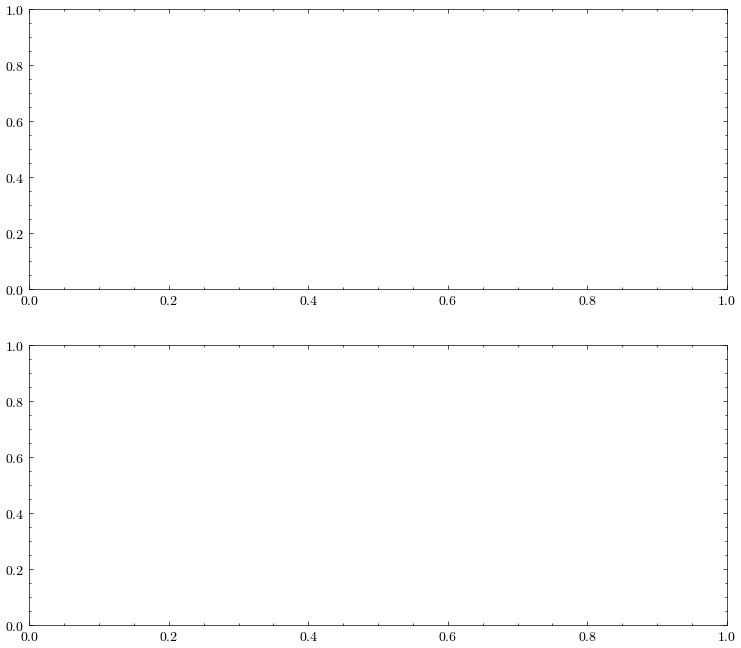

In [12]:
fname = '../monica/means_2016.csv'
mask = (df['de-date']>"2011-01-01") & (df['de-date']<"2017-01-01") 
select = df.loc[mask].set_index('de-date')


parameter = ['tavg']
styles = ['-.',  '-','--', '.-', '.-', '_']
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,8))
for i, key in enumerate(results_weather):
    df = results_weather[key]
    df['de-date'] = pd.to_datetime(df['de-date'], format="%d.%m.%Y")
    select = df.loc[(df['de-date']>'2017-04-01')&(df['de-date']<'2017-10-19')]
    select.set_index('de-date')[parameter].plot(style=styles[i], linewidth=1.0,ms=1.5, 
                                                ax=ax1, label=weather_translate[key])
ax1.legend(list(weather_translate.values()), frameon=True)
# ax1.grid()
ax1.set_xlabel('')
ax1.set_ylabel("$°C$")
# ax1.xaxis.set_ticklabels([])
# plt.savefig('../plots/tavg_2017.png', dpi=300)

parameter = ['precip']
styles = ['-.',  '-','--', '.-', '.-', '_']
# fig, ax1 = plt.subplots(1,1, figsize=(9,3))
for i, key in enumerate(results_weather):
    df = results_weather[key]
    df['de-date'] = pd.to_datetime(df['de-date'], format="%d.%m.%Y")
    select = df.loc[(df['de-date']>'2017-04-01')&(df['de-date']<'2017-10-19')]
    print(weather_translate[key])
    select.set_index('de-date')[parameter].plot(style=styles[i], linewidth=1.0,ms=1.5, 
                                                ax=ax2, label=weather_translate[key])
ax2.get_legend().remove()
# ax2.grid()
ax2.set_ylabel("$mm/day$")
ax2.set_xlabel('2017')
# plt.xticks(rotation=35)
from matplotlib.dates import DateFormatter
myFmt = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax1.text(-0.05, 1., "А", 
                 horizontalalignment='center', 
                 verticalalignment='center', transform=ax1.transAxes)

ax2.text(-0.05, 1., "B", 
                 horizontalalignment='center', 
                 verticalalignment='center', transform=ax2.transAxes)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.subplots_adjust(hspace=0.1)
# plt.subplot_tool()
# plt.savefig('../plots/weather_EN.png', dpi=300)
plt.show()
# plt.show()

In [23]:
fname = '../monica/means_2016.csv'
# fname = '../monica/means_2017.csv'
mask = (df['de-date']>"2011-01-01") & (df['de-date']<"2017-01-01") 
select = df.loc[mask].set_index('de-date')

In [24]:
df

,de-date,tavg,tmin,tmax,wind,globrad,precip,relhumid
0,2017-01-01,-14.381567,-14.633481,-9.902705,2.868780,5.415994,1.286186,95.208179
1,2017-01-02,-9.526147,-13.585106,-7.521373,2.716400,4.061230,1.416511,94.881454
2,2017-01-03,-4.379683,-7.595230,-4.344546,2.544775,3.545523,1.749084,94.143939
3,2017-01-04,-5.619050,-7.881420,-3.562000,3.961851,4.300544,1.384854,93.809862
4,2017-01-05,-9.734767,-10.583734,-8.144932,3.457969,4.168708,1.744579,93.715540
...,...,...,...,...,...,...,...,...
360,2017-12-27,-2.510911,-7.251662,-0.122837,3.668080,3.694261,1.358690,90.659937
361,2017-12-28,-5.915035,-8.320540,-3.620349,3.220044,4.751472,1.358352,92.165390
362,2017-12-29,-3.084832,-8.082155,-3.052842,3.149824,3.767562,1.310729,95.625541
363,2017-12-30,0.870349,-7.111821,1.983778,3.008712,3.124829,1.332620,93.311052


Observed
Mean
Prophet
Neural-prophet
SARIMAX


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1040 (\N{CYRILLIC CAPITAL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


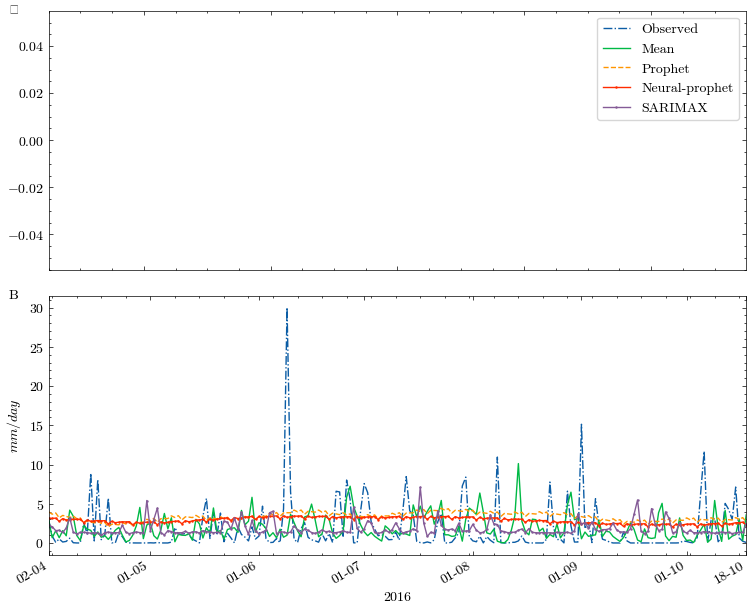

In [17]:
fname = '../monica/means_2016.csv'
mask = (df['de-date']>"2011-01-01") & (df['de-date']<"2017-01-01") 
select = df.loc[mask].set_index('de-date')


parameter = ['tavg']
styles = ['-.',  '-','--', '.-', '.-', '_']
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,8))
for i, key in enumerate(results_weather):
    df = results_weather[key]
    df['de-date'] = pd.to_datetime(df['de-date'], format="%d.%m.%Y")
    select = df.loc[(df['de-date']>'2016-04-01')&(df['de-date']<'2016-10-19')]
    select.set_index('de-date')[parameter].plot(style=styles[i], linewidth=1.0,ms=1.5, 
                                                ax=ax1, label=weather_translate[key])
ax1.legend(list(weather_translate.values()), frameon=True)
# ax1.grid()
ax1.set_xlabel('')
# ax1.set_ylabel("$°C$")
# ax1.xaxis.set_ticklabels([])
# plt.savefig('../plots/tavg_2017.png', dpi=300)

parameter = ['precip']
styles = ['-.',  '-','--', '.-', '.-', '_']
# fig, ax1 = plt.subplots(1,1, figsize=(9,3))
for i, key in enumerate(results_weather):
    df = results_weather[key]
    df['de-date'] = pd.to_datetime(df['de-date'], format="%d.%m.%Y")
    select = df.loc[(df['de-date']>'2017-04-01')&(df['de-date']<'2017-10-19')]
    print(weather_translate[key])
    select.set_index('de-date')[parameter].plot(style=styles[i], linewidth=1.0,ms=1.5, 
                                                ax=ax2, label=weather_translate[key])
ax2.get_legend().remove()
# ax2.grid()
ax2.set_ylabel("$mm/day$")
ax2.set_xlabel('2016')
# plt.xticks(rotation=35)
from matplotlib.dates import DateFormatter
myFmt = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax1.text(-0.05, 1., "А", 
                 horizontalalignment='center', 
                 verticalalignment='center', transform=ax1.transAxes)

ax2.text(-0.05, 1., "B", 
                 horizontalalignment='center', 
                 verticalalignment='center', transform=ax2.transAxes)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.subplots_adjust(hspace=0.1)
# plt.subplot_tool()
# plt.savefig('../plots/weather_EN.png', dpi=300)
plt.show()
# plt.show()

In [59]:
import json

In [62]:
with open('../monica/monica_input/site-monica.json', 'r') as file:
    data = json.load(file)

In [70]:
pd.DataFrame(data['SiteParameters']['SoilProfileParameters'])

,Thickness,SoilOrganicCarbon,KA5TextureClass,Sand,Clay,Skeleton,PoreVolume,FieldCapacity,PermanentWiltingPoint,pH,CN,SoilBulkDensity
0,"[0.3, m]","[5.1, %]",Lu,"[0.037, kg kg-1 (%[0-1])]","[0.09, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.566, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.213],[12.481],"[1126.625, kg m-3]"
1,"[0.1, m]","[3.3, %]",Lu,"[0.045, kg kg-1 (%[0-1])]","[0.088, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.594, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.397],[10.531],"[1056.667, kg m-3]"
2,"[0.1, m]","[2.8, %]",Lu,"[0.047, kg kg-1 (%[0-1])]","[0.086, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.606, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.525],[9.635],"[1024.013, kg m-3]"
3,"[0.1, m]","[2.3, %]",Lu,"[0.049, kg kg-1 (%[0-1])]","[0.086, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.612, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.608],[8.79],"[1010, kg m-3]"
4,"[0.1, m]","[1.9, %]",Lu,"[0.05, kg kg-1 (%[0-1])]","[0.088, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.604, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.655],[8.064],"[1036.433, kg m-3]"
5,"[0.1, m]","[1.6, %]",Lu,"[0.053, kg kg-1 (%[0-1])]","[0.094, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.572, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.677],[7.506],"[1113.334, kg m-3]"
6,"[0.1, m]","[1.3, %]",Lu,"[0.056, kg kg-1 (%[0-1])]","[0.103, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.529, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.686],[7.168],"[1225.838, kg m-3]"
7,"[0.1, m]","[1.0, %]",Lu,"[0.059, kg kg-1 (%[0-1])]","[0.112, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.486, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.691],[7.148],"[1336.666, kg m-3]"
8,"[0.1, m]","[0.8, %]",Lu,"[0.062, kg kg-1 (%[0-1])]","[0.12, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.448, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.703],[7.717],"[1432.502, kg m-3]"
9,"[0.1, m]","[0.6, %]",Lu,"[0.065, kg kg-1 (%[0-1])]","[0.125, kg kg-1 (%[0-1])]","[0.02, %[0-1]]","[0.42, m3 m-3]","[0.3, m3 m-3]","[0.15, m3 m-3]",[6.732],[12.738],"[1501.026, kg m-3]"


In [69]:
pd.DataFrame(data['SiteParameters']['SoilProfileParameters']).applymap(lambda x : x[0]).to_excel('../data/soil_prop.xlsx')